### 1. Marijuana Users vs. Non-Users

In [13]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
# Read DataFrame
df = pd.read_csv('Marijuana_2021.txt', delimiter='\t')

<ipython-input-13-f0206f92a682>:7: DtypeWarning: Columns (2792) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Marijuana_2021.txt', delimiter='\t')


In [14]:
# Export to Excel
#df.to_csv('Marijuana_2021.csv', index=False)
#from google.colab import files
# Download the CSV file
#files.download('Marijuana_2021.csv')

In [15]:
# Extract the columns in a list
columns_to_extract = ['CATAGE', 'AGE3', 'HEALTH','IRSEX', 'SEXIDENT','SPEAKENGL','EDUHIGHCAT','EDUSKPMON','EDUSKPEST',
                      'MJEVER', 'MJAGE', 'MRDAYPYR','MRDAYPMO','MRDAYPWK', 'IRMJFY', 'IRMJFM',
                      'UDMJMNTLPRB','UDMJMNTLCTD','UDMJWORKPRB','UDMJFMLYPRB','UDMJFMLYCTD',
                      'UDMJWDANGRY','UDMJWDSLEEP','UDMJWDFLANX','UDMJWDSITST','UDMJWDDEPRS', 'DSTCHR30',
                      'DSTNRV30', 'IMPCONCN','IMPSOCM','IMPWEEKS','IMPDYFRQ','IMPYDAYS', 'IMPHHLDM', 'UDMJTRYSTOP', 'UDMJAVWMARJ',
                      'SUICTHNK','COSUITHNK','DSTNRV12','DSTHOP12','DSTCHR12','IMPSOC','DSTRST12','DSTNGD12','EDUSCKMON','CONEGMH','IMPRESP']

# Create a new DataFrame with Young Age categories 18-25 years old
selected_df = df[columns_to_extract]
mask = selected_df['CATAGE'] == 2
smokers_df1 = selected_df[mask]


exclude_values = [83,85,91,93,94,97,98,99]
smokers_df = smokers_df1[~smokers_df1['MJEVER'].isin(exclude_values)]

In [16]:
# Count value in MJEVER column
mjever_counts = smokers_df['MJEVER'].value_counts()
print(mjever_counts)

2    7105
1    6810
3      57
Name: MJEVER, dtype: int64


###1.1 Emotional Health

####a. Feeling nervous (DSTNRV12)

In [17]:
from scipy.stats import chi2_contingency
# Create a contingency table
nervous = smokers_df[~smokers_df['DSTNRV12'].isin(exclude_values)]
contingency_nervous = pd.crosstab(nervous['MJEVER'], nervous['DSTNRV12'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_nervous)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")

alpha = 0.05

# Check the p-value
if p < alpha:
    print("There is a significant association between marijuana use and feeling nervous level.")
else:
    print("There is no significant association between marijuana use and feeling nervous level.")


Chi-Square Statistic: 52.9429
P-value: 1.1062e-08
There is a significant association between marijuana use and feeling nervous level.


In [18]:
from scipy.stats import mannwhitneyu

# Separate the data into two groups: smokers and non-smokers
smokers_nervous = nervous[nervous['MJEVER'].isin([1, 3])]['DSTNRV12']
non_smokers_nervous = nervous[nervous['MJEVER'] == 2]['DSTNRV12']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(smokers_nervous, non_smokers_nervous)

print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05

# Check the p-value
if p_value < alpha:
    print("The Mann-Whitney U test results are significant.")
else:
    print("The Mann-Whitney U test results are not significant.")

Mann-Whitney U Statistic: 3688050.0000
P-value: 9.7470e-13
The Mann-Whitney U test results are significant.


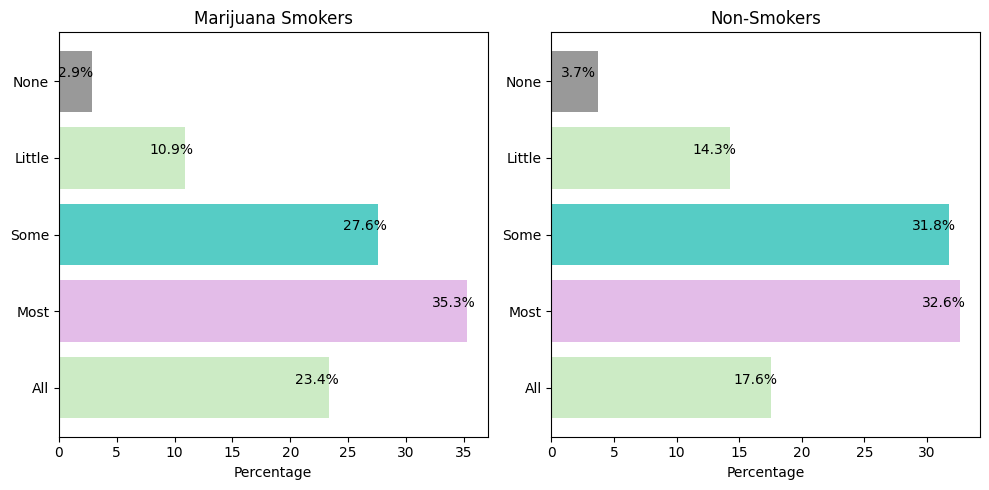

In [20]:
from matplotlib.colors import ListedColormap
level_mapping = {1: 'All', 2: 'Most', 3: 'Some', 4: 'Little', 5: 'None'}

# Define custom colors for each level
level_colors = {1: '#ccebc5', 2: '#E3BCE8', 3: '#56CCC5', 4: '#ccebc5', 5: '#999999'}

# Filter marijuana smokers (MJEVER = 1 or 3)
smokers = nervous[nervous['MJEVER'].isin([1, 3])]
non_smokers_df = nervous[nervous['MJEVER'] == 2]

# Count the total number of smokers and non-smokers
total_smokers = len(smokers)
total_non_smokers = len(non_smokers_df)

# Create a function to calculate percentages and add labels
def plot_percentage_bars(ax, level_counts, total_count, title):
    percentages = (level_counts / total_count) * 100
    colors = [level_colors[level] for level in level_counts.index]
    color_map = ListedColormap(colors)
    bars = ax.barh(range(len(level_mapping)), percentages, color=color_map(range(len(level_mapping))))
    ax.set_title(title)
    ax.set_xlabel('Percentage')
    ax.set_yticks(range(len(level_mapping)))
    ax.set_yticklabels(level_mapping.values())

    # Add percentages within each bar (color: black) with adjusted position
    for i, (percentage, count) in enumerate(zip(percentages, level_counts)):
        ax.text(percentage - 3, i, f'{percentage:.1f}%\n', ha='left', va='center', color='black')

# Plotting
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
plot_percentage_bars(ax1, smokers['DSTNRV12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_smokers, 'Marijuana Smokers')

ax2 = plt.subplot(1, 2, 2)
plot_percentage_bars(ax2, non_smokers_df['DSTNRV12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_non_smokers, 'Non-Smokers')

plt.tight_layout()
plt.show()

####b. Feeling hopeless (DSTHOP12)

In [21]:
# Create a contingency table
hopeless = smokers_df[~smokers_df['DSTHOP12'].isin(exclude_values)]
contingency_hopeless = pd.crosstab(nervous['MJEVER'], nervous['DSTHOP12'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_hopeless)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")

alpha = 0.05

# Check the p-value
if p < alpha:
    print("There is a significant association between marijuana use and feeling hopeless level.")
else:
    print("There is no significant association between marijuana use and feeling hopeless level.")

Chi-Square Statistic: 110.0811
P-value: 5.7671e-18
There is a significant association between marijuana use and feeling hopeless level.


In [22]:
from scipy.stats import mannwhitneyu

# Separate the data into two groups: smokers and non-smokers
smokers_hopeless = hopeless[hopeless['MJEVER'].isin([1, 3])]['DSTHOP12']
non_smokers_hopeless = hopeless[hopeless['MJEVER'] == 2]['DSTHOP12']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(smokers_hopeless, non_smokers_hopeless)

print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05

# Check the p-value
if p_value < alpha:
    print("The Mann-Whitney U test results are significant.")
else:
    print("The Mann-Whitney U test results are not significant.")

Mann-Whitney U Statistic: 3526951.5000
P-value: 8.5462e-22
The Mann-Whitney U test results are significant.


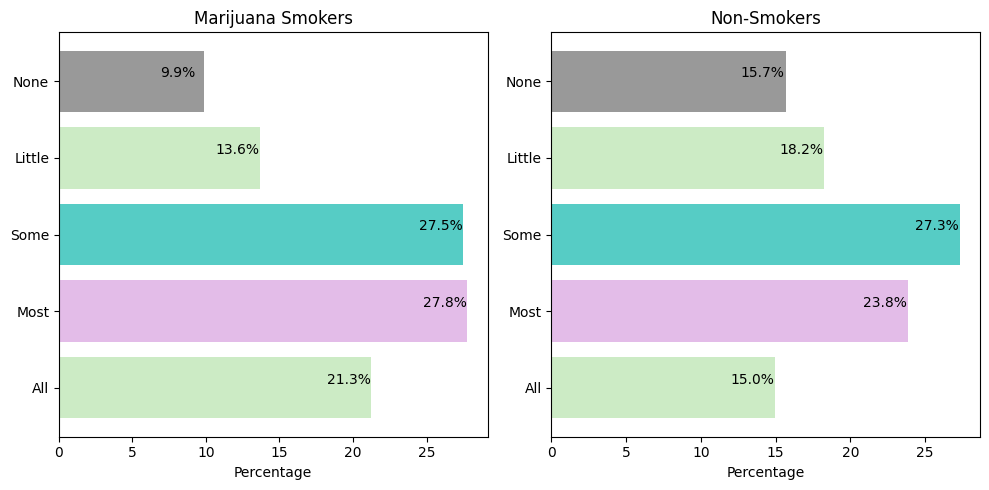

In [23]:
level_mapping = {1: 'All', 2: 'Most', 3: 'Some', 4: 'Little', 5: 'None'}

# Define custom colors for each level
level_colors = {1: '#ccebc5', 2: '#E3BCE8', 3: '#56CCC5', 4: '#ccebc5', 5: '#999999'}

# Filter marijuana smokers (MJEVER = 1 or 3)
smokers = hopeless[hopeless['MJEVER'].isin([1, 3])]
non_smokers_df = hopeless[hopeless['MJEVER'] == 2]

# Count the total number of smokers and non-smokers
total_smokers = len(smokers)
total_non_smokers = len(non_smokers_df)

# Create a function to calculate percentages and add labels
def plot_percentage_bars(ax, level_counts, total_count, title):
    percentages = (level_counts / total_count) * 100
    colors = [level_colors[level] for level in level_counts.index]
    color_map = ListedColormap(colors)
    bars = ax.barh(range(len(level_mapping)), percentages, color=color_map(range(len(level_mapping))))
    ax.set_title(title)
    ax.set_xlabel('Percentage')
    ax.set_yticks(range(len(level_mapping)))
    ax.set_yticklabels(level_mapping.values())

    # Add percentages within each bar (color: black) with adjusted position
    for i, (percentage, count) in enumerate(zip(percentages, level_counts)):
        ax.text(percentage - 3, i, f'{percentage:.1f}%\n', ha='left', va='center', color='black')

# Plotting
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
plot_percentage_bars(ax1, smokers['DSTHOP12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_smokers, 'Marijuana Smokers')

ax2 = plt.subplot(1, 2, 2)
plot_percentage_bars(ax2, non_smokers_df['DSTHOP12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_non_smokers, 'Non-Smokers')

plt.tight_layout()
plt.show()

####c. Feeling restless (DSTRST12)

In [24]:
# Create a contingency table
restless = smokers_df[~smokers_df['DSTRST12'].isin(exclude_values)]
contingency_restless = pd.crosstab(restless['MJEVER'], restless['DSTRST12'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_restless)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")

alpha = 0.05

# Check the p-value
if p < alpha:
    print("There is a significant association between marijuana use and feeling restless level.")
else:
    print("There is no significant association between marijuana use and feeling restless level.")

Chi-Square Statistic: 55.5708
P-value: 3.4192e-09
There is a significant association between marijuana use and feeling restless level.


In [26]:
from scipy.stats import mannwhitneyu

# Separate the data into two groups: smokers and non-smokers
smokers_restless = restless[restless['MJEVER'].isin([1, 3])]['DSTRST12']
non_smokers_restless = restless[restless['MJEVER'] == 2]['DSTRST12']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(smokers_restless, non_smokers_hopeless)

print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05

# Check the p-value
if p_value < alpha:
    print("The Mann-Whitney U test results are significant.")
else:
    print("The Mann-Whitney U test results are not significant.")

Mann-Whitney U Statistic: 3684823.5000
P-value: 2.4584e-12
The Mann-Whitney U test results are significant.


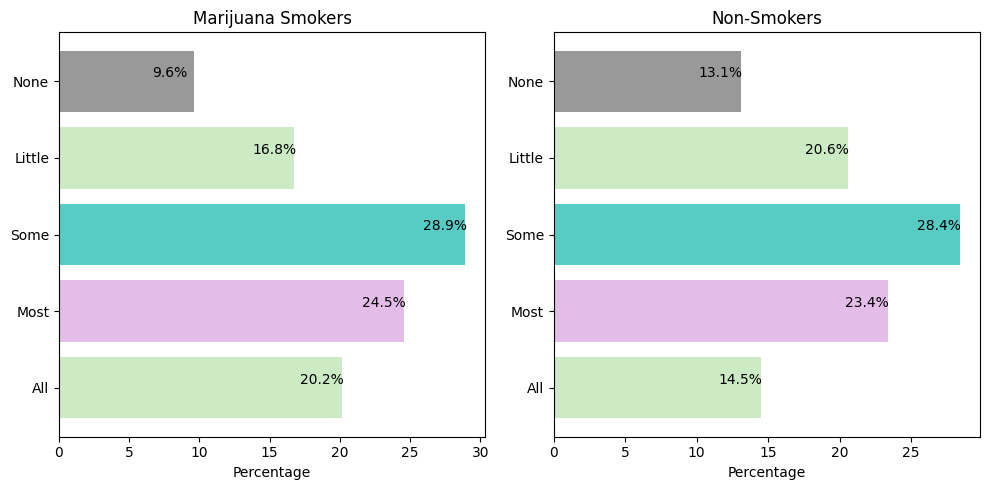

In [27]:
level_mapping = {1: 'All', 2: 'Most', 3: 'Some', 4: 'Little', 5: 'None'}

# Define custom colors for each level
level_colors = {1: '#ccebc5', 2: '#E3BCE8', 3: '#56CCC5', 4: '#ccebc5', 5: '#999999'}

# Filter marijuana smokers (MJEVER = 1 or 3)
smokers = restless[restless['MJEVER'].isin([1, 3])]
non_smokers_df = restless[restless['MJEVER'] == 2]

# Count the total number of smokers and non-smokers
total_smokers = len(smokers)
total_non_smokers = len(non_smokers_df)

# Create a function to calculate percentages and add labels
def plot_percentage_bars(ax, level_counts, total_count, title):
    percentages = (level_counts / total_count) * 100
    colors = [level_colors[level] for level in level_counts.index]
    color_map = ListedColormap(colors)
    bars = ax.barh(range(len(level_mapping)), percentages, color=color_map(range(len(level_mapping))))
    ax.set_title(title)
    ax.set_xlabel('Percentage')
    ax.set_yticks(range(len(level_mapping)))
    ax.set_yticklabels(level_mapping.values())

    # Add percentages within each bar (color: black) with adjusted position
    for i, (percentage, count) in enumerate(zip(percentages, level_counts)):
        ax.text(percentage - 3, i, f'{percentage:.1f}%\n', ha='left', va='center', color='black')

# Plotting
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
plot_percentage_bars(ax1, smokers['DSTRST12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_smokers, 'Marijuana Smokers')

ax2 = plt.subplot(1, 2, 2)
plot_percentage_bars(ax2, non_smokers_df['DSTRST12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_non_smokers, 'Non-Smokers')

plt.tight_layout()
plt.show()

####d. Feeling depressed (DSTCHR12)

In [29]:
# Create a contingency table
depressed = smokers_df[~smokers_df['DSTCHR12'].isin(exclude_values)]
contingency_depress = pd.crosstab(depressed['MJEVER'], depressed['DSTCHR12'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_depress)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")

alpha = 0.05

# Check the p-value
if p < alpha:
    print("There is a significant association between marijuana use and feeling depressed level.")
else:
    print("There is no significant association between marijuana use and feeling depressed level.")

Chi-Square Statistic: 135.3129
P-value: 2.2354e-25
There is a significant association between marijuana use and feeling depressed level.


In [31]:
from scipy.stats import mannwhitneyu

# Separate the data into two groups: smokers and non-smokers
smokers_depress = depressed[depressed['MJEVER'].isin([1, 3])]['DSTCHR12']
non_smokers_depress = depressed[depressed['MJEVER'] == 2]['DSTCHR12']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(smokers_depress, non_smokers_depress)

print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")  # Display p-value in scientific notation with 4 decimal places

alpha = 0.05

# Check the p-value
if p_value < alpha:
    print("The Mann-Whitney U test results are significant.")
else:
    print("The Mann-Whitney U test results are not significant.")

Mann-Whitney U Statistic: 3448747.0000
P-value: 3.9034e-27
The Mann-Whitney U test results are significant.


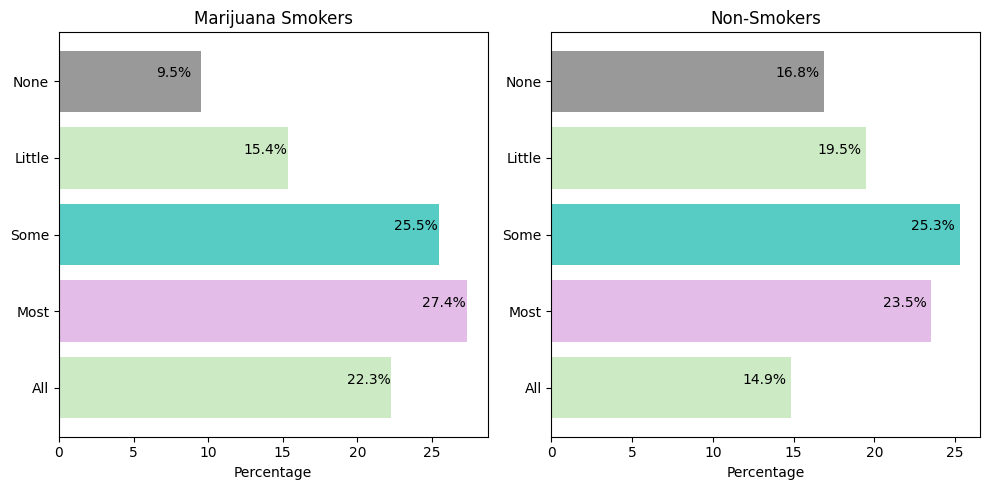

In [32]:
level_mapping = {1: 'All', 2: 'Most', 3: 'Some', 4: 'Little', 5: 'None'}

# Define custom colors for each level
level_colors = {1: '#ccebc5', 2: '#E3BCE8', 3: '#56CCC5', 4: '#ccebc5', 5: '#999999'}

# Filter marijuana smokers (MJEVER = 1 or 3)
smokers = depressed[depressed['MJEVER'].isin([1, 3])]
non_smokers_df = depressed[depressed['MJEVER'] == 2]

# Count the total number of smokers and non-smokers
total_smokers = len(smokers)
total_non_smokers = len(non_smokers_df)

# Create a function to calculate percentages and add labels
def plot_percentage_bars(ax, level_counts, total_count, title):
    percentages = (level_counts / total_count) * 100
    colors = [level_colors[level] for level in level_counts.index]
    color_map = ListedColormap(colors)
    bars = ax.barh(range(len(level_mapping)), percentages, color=color_map(range(len(level_mapping))))
    ax.set_title(title)
    ax.set_xlabel('Percentage')
    ax.set_yticks(range(len(level_mapping)))
    ax.set_yticklabels(level_mapping.values())

    # Add percentages within each bar (color: black) with adjusted position
    for i, (percentage, count) in enumerate(zip(percentages, level_counts)):
        ax.text(percentage - 3, i, f'{percentage:.1f}%\n', ha='left', va='center', color='black')

# Plotting
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
plot_percentage_bars(ax1, smokers['DSTCHR12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_smokers, 'Marijuana Smokers')

ax2 = plt.subplot(1, 2, 2)
plot_percentage_bars(ax2, non_smokers_df['DSTCHR12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_non_smokers, 'Non-Smokers')

plt.tight_layout()
plt.show()

####e. Feeling down on yourself (DSTNGD12)

In [33]:
# Create a contingency table
down = smokers_df[~smokers_df['DSTNGD12'].isin(exclude_values)]
contingency_down = pd.crosstab(down['MJEVER'], down['DSTNGD12'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_down)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")

alpha = 0.05

# Check the p-value
if p < alpha:
    print("There is a significant association between marijuana use and feeling down level.")
else:
    print("There is no significant association between marijuana use and feeling down level.")

Chi-Square Statistic: 103.9823
P-value: 6.5382e-19
There is a significant association between marijuana use and feeling down level.


In [35]:
from scipy.stats import mannwhitneyu

# Separate the data into two groups: smokers and non-smokers
smokers_down = down[down['MJEVER'].isin([1, 3])]['DSTNGD12']
non_smokers_down = down[down['MJEVER'] == 2]['DSTNGD12']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(smokers_down, non_smokers_down)

print(f"Mann-Whitney U Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The Mann-Whitney U test results are significant.")
else:
    print("The Mann-Whitney U test results are not significant.")

Mann-Whitney U Statistic: 3517285.5000
P-value: 1.0701e-21
The Mann-Whitney U test results are significant.


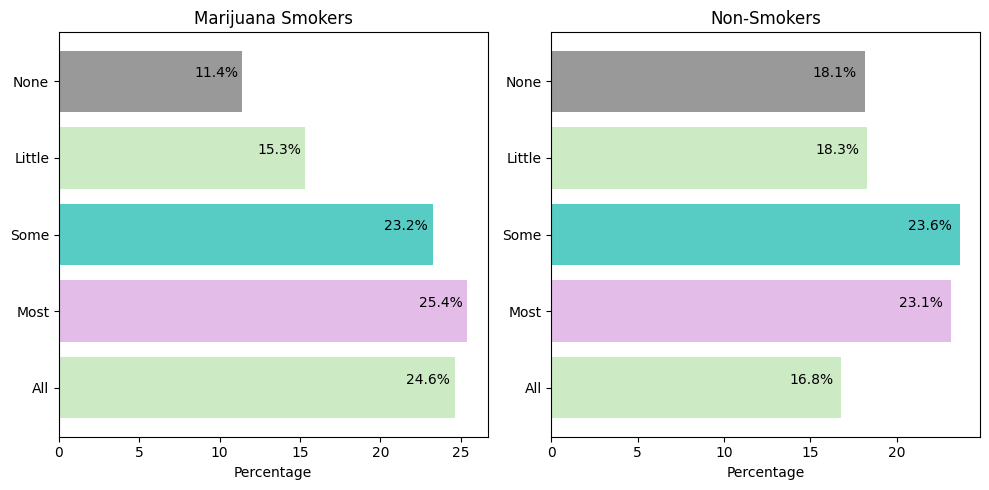

In [36]:
level_mapping = {1: 'All', 2: 'Most', 3: 'Some', 4: 'Little', 5: 'None'}

# Define custom colors for each level
level_colors = {1: '#ccebc5', 2: '#E3BCE8', 3: '#56CCC5', 4: '#ccebc5', 5: '#999999'}

# Filter marijuana smokers (MJEVER = 1 or 3)
smokers = down[down['MJEVER'].isin([1, 3])]
non_smokers_df = down[down['MJEVER'] == 2]

# Count the total number of smokers and non-smokers
total_smokers = len(smokers)
total_non_smokers = len(non_smokers_df)

# Create a function to calculate percentages and add labels
def plot_percentage_bars(ax, level_counts, total_count, title):
    percentages = (level_counts / total_count) * 100
    colors = [level_colors[level] for level in level_counts.index]
    color_map = ListedColormap(colors)
    bars = ax.barh(range(len(level_mapping)), percentages, color=color_map(range(len(level_mapping))))
    ax.set_title(title)
    ax.set_xlabel('Percentage')
    ax.set_yticks(range(len(level_mapping)))
    ax.set_yticklabels(level_mapping.values())

    # Add percentages within each bar (color: black) with adjusted position
    for i, (percentage, count) in enumerate(zip(percentages, level_counts)):
        ax.text(percentage - 3, i, f'{percentage:.1f}%\n', ha='left', va='center', color='black')

# Plotting
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
plot_percentage_bars(ax1, smokers['DSTNGD12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_smokers, 'Marijuana Smokers')

ax2 = plt.subplot(1, 2, 2)
plot_percentage_bars(ax2, non_smokers_df['DSTNGD12'].value_counts().reindex(level_mapping.keys(), fill_value=0),
                     total_non_smokers, 'Non-Smokers')

plt.tight_layout()
plt.show()

###1.2 Overall Health

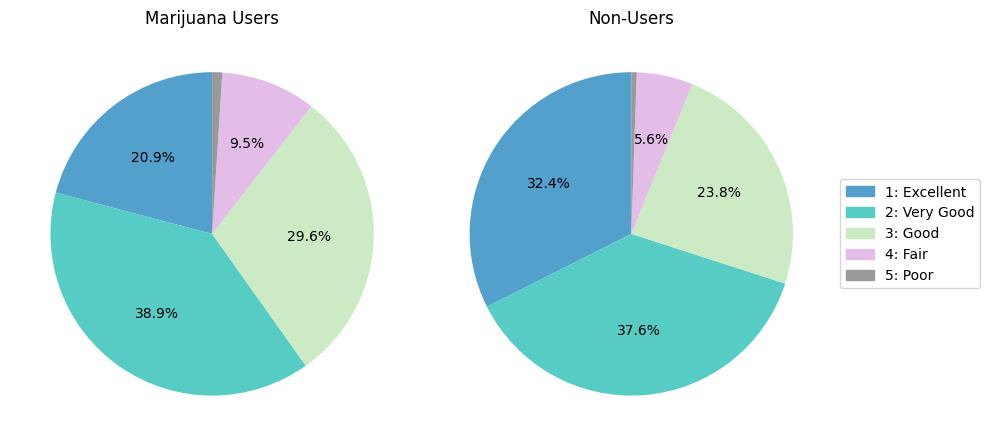

<Figure size 640x480 with 0 Axes>

In [37]:
health = smokers_df[~smokers_df['HEALTH'].isin(exclude_values)]
level_mapping = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}

# Filter marijuana smokers (MJEVER = 1 or 3)
smokers = health[health['MJEVER'].isin([1,3])]
non_smokers_df = health[health['MJEVER'] == 2]

level_counts_smokers = smokers['HEALTH'].value_counts().reindex(level_mapping.keys(), fill_value=0)
level_counts_non_smokers = non_smokers_df['HEALTH'].value_counts().reindex(level_mapping.keys(), fill_value=0)

# Define colors
custom_colors = ['#53A0CC','#56CCC5','#ccebc5', '#E3BCE8','#999999'] #69BC64
plt.figure(figsize=(10, 6))
def custom_autopct(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# Pie chart for smokers
plt.subplot(1, 2, 1)
plt.pie(level_counts_smokers, autopct=custom_autopct, startangle=90, colors=custom_colors)
plt.title('Marijuana Users')

# Pie chart for non-smokers
plt.subplot(1, 2, 2)
plt.pie(level_counts_non_smokers, autopct=custom_autopct, startangle=90, colors=custom_colors)
plt.title('Non-Users')

# Add a legend with color descriptions to the side
legend_elements = [Patch(color=custom_colors[i], label=f"{label}: {description}") for i, (label, description) in enumerate(level_mapping.items())]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

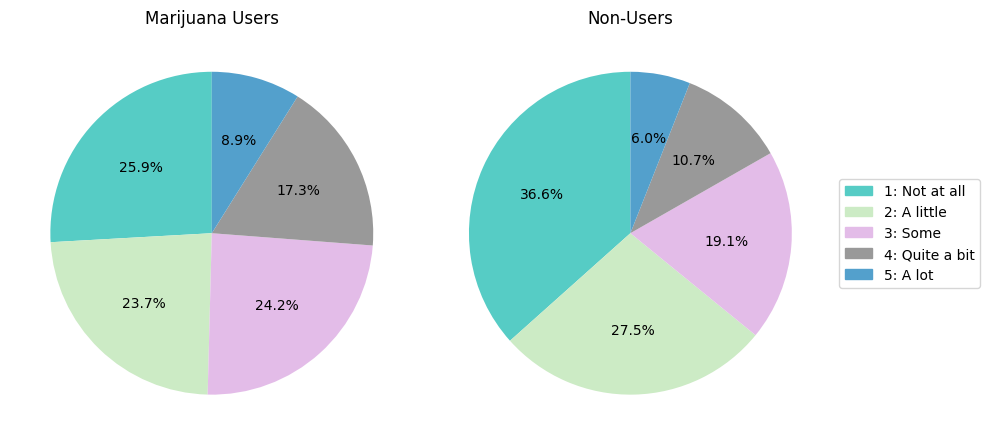

<Figure size 640x480 with 0 Axes>

In [38]:
covid = smokers_df[~smokers_df['CONEGMH'].isin(exclude_values)]
level_mapping = {1: 'Not at all', 2: 'A little', 3: 'Some', 4: 'Quite a bit', 5: 'A lot'}

# Filter marijuana smokers (MJEVER = 1 or 3)
smokers = covid[covid['MJEVER'].isin([1,3])]
non_smokers_df = covid[covid['MJEVER'] == 2]

level_counts_smokers = smokers['CONEGMH'].value_counts().reindex(level_mapping.keys(), fill_value=0)
level_counts_non_smokers = non_smokers_df['CONEGMH'].value_counts().reindex(level_mapping.keys(), fill_value=0)

# Define colors
custom_colors = ['#56CCC5','#ccebc5', '#E3BCE8','#999999','#53A0CC'] #69BC64
plt.figure(figsize=(10, 6))
def custom_autopct(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# Pie chart for smokers
plt.subplot(1, 2, 1)
plt.pie(level_counts_smokers, autopct=custom_autopct, startangle=90, colors=custom_colors )
plt.title('Marijuana Users')

# Pie chart for non-smokers
plt.subplot(1, 2, 2)
plt.pie(level_counts_non_smokers, autopct=custom_autopct, startangle=90, colors=custom_colors )
plt.title('Non-Users')

# Add a legend with color descriptions to the side
legend_elements = [Patch(color=custom_colors [i], label=f"{label}: {description}") for i, (label, description) in enumerate(level_mapping.items())]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

###2. Frequency of Mental Health Effect among Marijuana Users

###2.1 Substance Disorder

In [39]:
import matplotlib.pyplot as plt

# Young Adult and Use Marijuana
smoker = smokers_df1[(smokers_df1['IRMJFY'] != 991) & (smokers_df1['IRMJFY'] != 993)]

<ipython-input-41-1904ada2c829>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_lasting['UDMJMNTLPRB'] = long_lasting['UDMJMNTLPRB'].map(level_mapping)


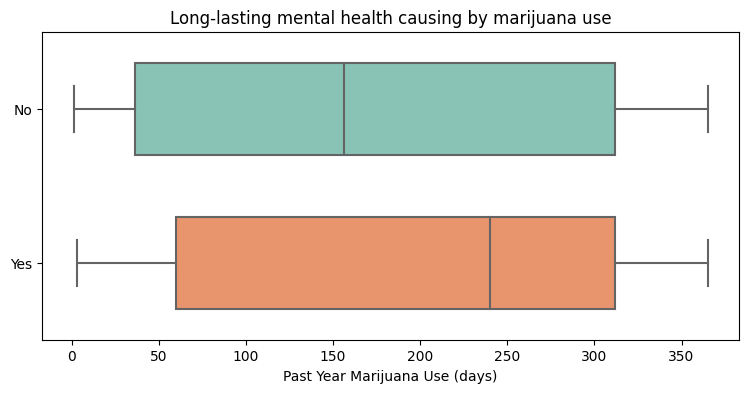

Median for 'Yes': 240.00
Median for 'No': 156.00
Mean for 'Yes': 202.96
Mean for 'No': 174.92


In [41]:
long_lasting = smoker[~smoker['UDMJMNTLPRB'].isin(exclude_values)]

level_mapping = {
    2: 'No',
    1:'Yes'
}
long_lasting['UDMJMNTLPRB'] = long_lasting['UDMJMNTLPRB'].map(level_mapping)

colors = {'Yes': '#fc8d59', 'No': '#7fcdbb'}
plt.figure(figsize=(9, 4))
sns.boxplot(x='IRMJFY', y='UDMJMNTLPRB', data=long_lasting, order=level_mapping.values(), width=0.6, palette=colors)
plt.xlabel('Past Year Marijuana Use (days)')
plt.ylabel('')
plt.title('Long-lasting mental health causing by marijuana use')
plt.show()

grouped_data = long_lasting.groupby('UDMJMNTLPRB')['IRMJFY']

# Median
median = grouped_data.median()
print(f"Median for 'Yes': {median['Yes']:.2f}")
print(f"Median for 'No': {median['No']:.2f}")

# Mean
mean = grouped_data.mean()
print(f"Mean for 'Yes': {mean['Yes']:.2f}")
print(f"Mean for 'No': {mean['No']:.2f}")

<ipython-input-43-2e7073f88ec3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disorder_angry['UDMJWDANGRY'] = disorder_angry['UDMJWDANGRY'].map(level_mapping)


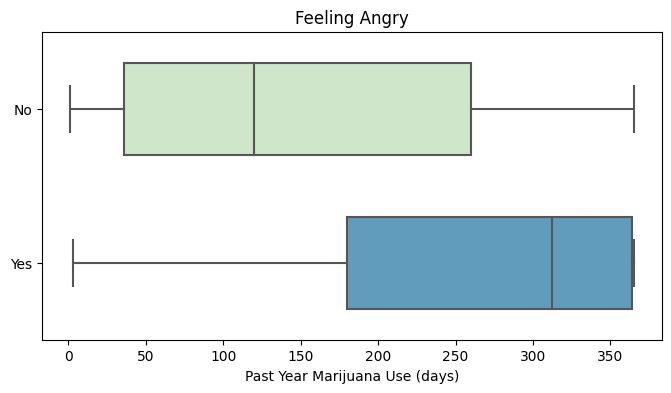

In [43]:
disorder_angry = smoker[~smoker['UDMJWDANGRY'].isin(exclude_values)]

level_mapping = {
    2: 'No',
    1:'Yes'
}
disorder_angry['UDMJWDANGRY'] = disorder_angry['UDMJWDANGRY'].map(level_mapping)


colors = {'Yes': '#53A0CC', 'No': '#ccebc5'}
plt.figure(figsize=(8, 4))
sns.boxplot(x='IRMJFY', y='UDMJWDANGRY', data=disorder_angry, order=level_mapping.values(), width=0.6, palette=colors)  # Adjust the width
plt.xlabel('Past Year Marijuana Use (days)')
plt.ylabel('')
plt.title('Feeling Angry')
plt.show()

<ipython-input-44-f673680bc224>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disorder_anxious['UDMJWDFLANX'] = disorder_anxious['UDMJWDFLANX'].map(level_mapping)


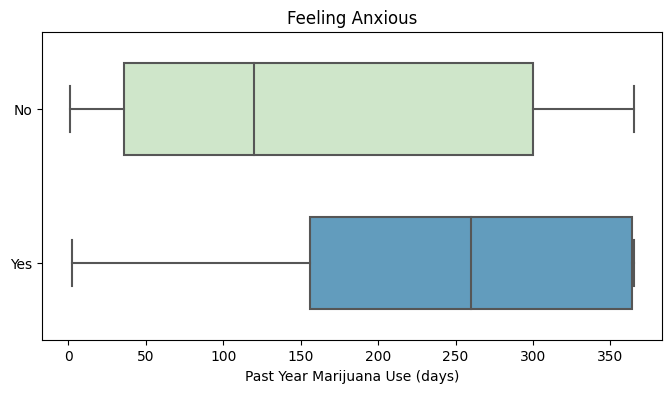

In [44]:
disorder_anxious = smoker[~smoker['UDMJWDFLANX'].isin(exclude_values)]

level_mapping = {
    2: 'No',
    1:'Yes'
}
disorder_anxious['UDMJWDFLANX'] = disorder_anxious['UDMJWDFLANX'].map(level_mapping)

colors = {'Yes': '#53A0CC', 'No': '#ccebc5'}
plt.figure(figsize=(8, 4))
sns.boxplot(x='IRMJFY', y='UDMJWDFLANX', data=disorder_anxious, order=level_mapping.values(), width=0.6, palette=colors)  # Adjust the width
plt.xlabel('Past Year Marijuana Use (days)')
plt.ylabel('')
plt.title('Feeling Anxious')
plt.show()

<ipython-input-45-b7b0476d78b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disorder_sleep['UDMJWDSLEEP'] = disorder_sleep['UDMJWDSLEEP'].map(level_mapping)


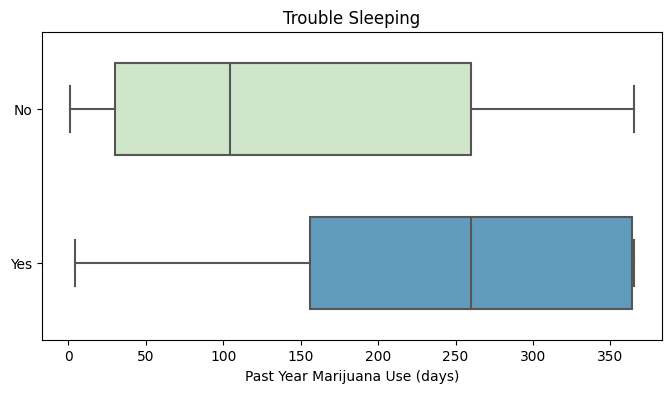

In [45]:
disorder_sleep = smoker[~smoker['UDMJWDSLEEP'].isin(exclude_values)]

level_mapping = {
    2: 'No',
    1:'Yes'
}
disorder_sleep['UDMJWDSLEEP'] = disorder_sleep['UDMJWDSLEEP'].map(level_mapping)

colors = {'Yes': '#53A0CC', 'No': '#ccebc5'}
plt.figure(figsize=(8, 4))
sns.boxplot(x='IRMJFY', y='UDMJWDSLEEP', data=disorder_sleep, order=level_mapping.values(), width=0.6, palette=colors)  # Adjust the width
plt.xlabel('Past Year Marijuana Use (days)')
plt.ylabel('')
plt.title('Trouble Sleeping')
plt.show()

<ipython-input-46-afefcc30c0e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disorder_sitstill['UDMJWDSITST'] = disorder_sitstill['UDMJWDSITST'].map(level_mapping)


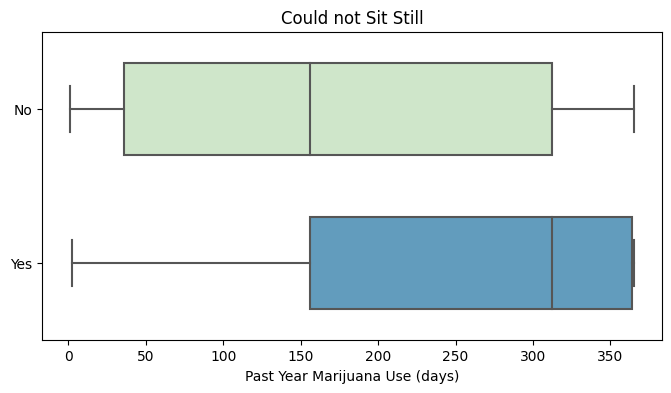

In [46]:
disorder_sitstill = smoker[~smoker['UDMJWDSITST'].isin(exclude_values)]

level_mapping = {
    2: 'No',
    1:'Yes'
}
disorder_sitstill['UDMJWDSITST'] = disorder_sitstill['UDMJWDSITST'].map(level_mapping)

colors = {'Yes': '#53A0CC', 'No': '#ccebc5'}
plt.figure(figsize=(8, 4))
sns.boxplot(x='IRMJFY', y='UDMJWDSITST', data=disorder_sitstill, order=level_mapping.values(), width=0.6, palette=colors)  # Adjust the width
plt.xlabel('Past Year Marijuana Use (days)')
plt.ylabel('')
plt.title('Could not Sit Still')
plt.show()

###2.2 Social Connection

<ipython-input-47-9f7ed862c4d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_trouble ['UDMJWORKPRB'] = social_trouble ['UDMJWORKPRB'].map(level_mapping)


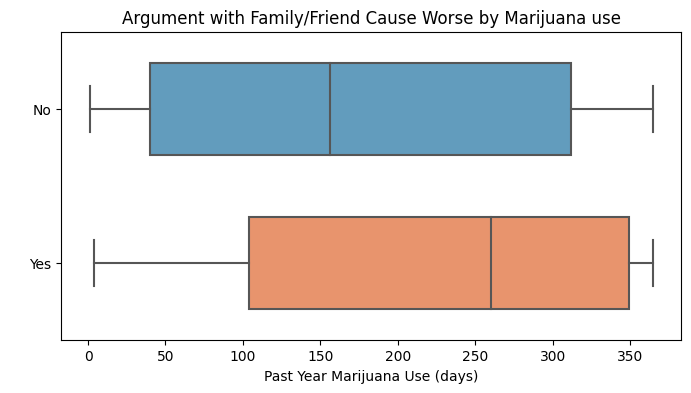

Median for 'Yes': 260.00
Median for 'No': 156.00
Mean for 'Yes': 222.97
Mean for 'No': 176.94


In [47]:
social_trouble = smoker[~smoker['UDMJWORKPRB'].isin(exclude_values)]

level_mapping = {
    2: 'No',
    1:'Yes'
}
social_trouble ['UDMJWORKPRB'] = social_trouble ['UDMJWORKPRB'].map(level_mapping)

colors = {'Yes': '#fc8d59', 'No': '#53A0CC'}
plt.figure(figsize=(8, 4))
sns.boxplot(x='IRMJFY', y='UDMJWORKPRB', data=social_trouble , order=level_mapping.values(), width=0.6, palette=colors )  # Adjust the width
plt.xlabel('Past Year Marijuana Use (days)')
plt.ylabel(' ')
plt.title('Argument with Family/Friend Cause Worse by Marijuana use')
plt.show()
grouped_data = social_trouble.groupby('UDMJWORKPRB')['IRMJFY']

# Median
median = grouped_data.median()
print(f"Median for 'Yes': {median['Yes']:.2f}")
print(f"Median for 'No': {median['No']:.2f}")

# Mean
mean = grouped_data.mean()
print(f"Mean for 'Yes': {mean['Yes']:.2f}")
print(f"Mean for 'No': {mean['No']:.2f}")

In [48]:
from scipy.stats import spearmanr, kendalltau
value = [5,85,94,97,98,99]
social_activities = smoker[~smoker['IMPSOC'].isin(value)]

# Calculate Spearman's correlation
spearman_social_cor, spearman_social_p = spearmanr(social_activities['IRMJFY'], social_activities['IMPSOC'])

# Calculate Kendall's Tau
kendall_social_tau, kendall_social_p = kendalltau(social_activities['IRMJFY'], social_activities['IMPSOC'])

# Print the results
print(f"Spearman's Correlation: {spearman_social_cor:.4f}, p-value: {spearman_social_p:.4e}")
print(f"Kendall's Tau: {kendall_social_tau:.4f}, p-value: {kendall_social_p:.4e}")

Spearman's Correlation: 0.0379, p-value: 2.0220e-02
Kendall's Tau: 0.0292, p-value: 1.9710e-02


<ipython-input-49-b48304f9ebc0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_activities['Daily Responsibility'] = social_activities['IMPSOC'].map(level)


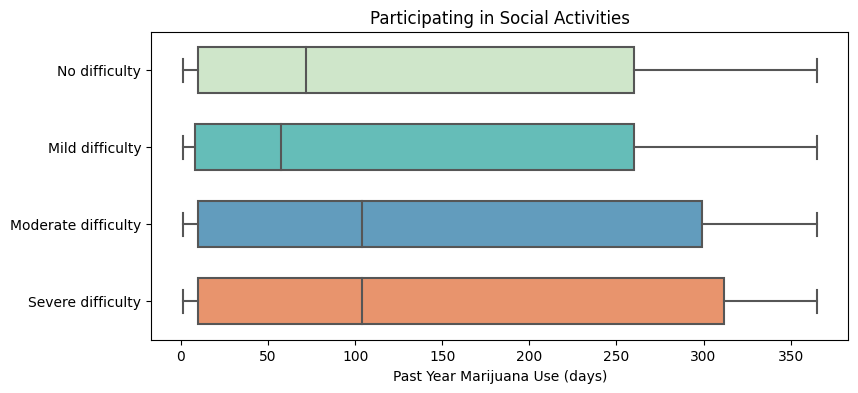

In [49]:
level = {
    1: 'No difficulty',
    2: 'Mild difficulty',
    3: 'Moderate difficulty',
    4: 'Severe difficulty'}
social_activities['Daily Responsibility'] = social_activities['IMPSOC'].map(level)

order = ['No difficulty', 'Mild difficulty', 'Moderate difficulty', 'Severe difficulty']
colors = {'No difficulty': '#ccebc5', 'Mild difficulty': '#56CCC5', 'Moderate difficulty': '#53A0CC', 'Severe difficulty': '#fc8d59'}

plt.figure(figsize=(9, 4))
sns.boxplot(x='IRMJFY', y='Daily Responsibility', data= social_activities,order=order, width=0.6, palette=colors)  # Adjust the width
plt.xlabel('Past Year Marijuana Use (days)')
plt.ylabel('')
plt.title('Participating in Social Activities')
plt.show()

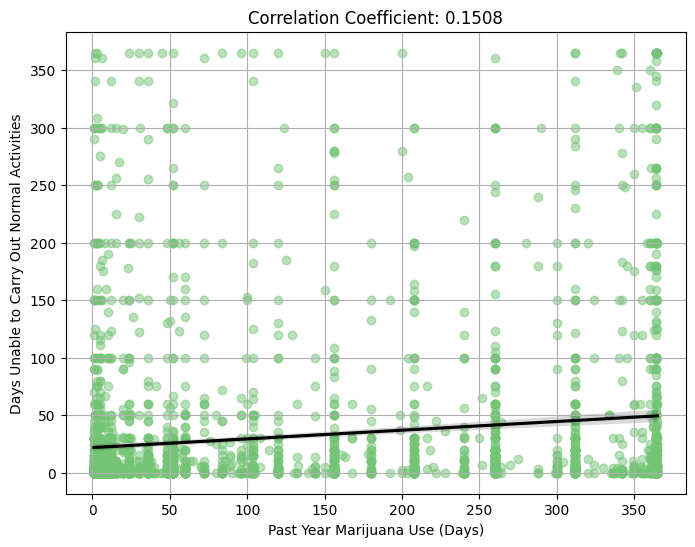

In [50]:
values = [985,994,997,998,999]
social_unable_to_work = smoker[~smoker['IMPYDAYS'].isin(values)]
correlation_coefficient = social_unable_to_work['IRMJFY'].corr(social_unable_to_work['IMPYDAYS'])

# Create a scatterplot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=social_unable_to_work, x='IRMJFY', y='IMPYDAYS', scatter_kws={'alpha':0.5,'color':'#74c476'}, line_kws={'color': 'black'})
plt.title(f'Correlation Coefficient: {correlation_coefficient:.4f}')
plt.xlabel('Past Year Marijuana Use (Days)')
plt.ylabel('Days Unable to Carry Out Normal Activities')
plt.grid(True)
plt.show()